<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=123644373" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## SharkTank US Exploratory Data Analysis (EDA) 

## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"))

Notebook was last executed on: 2023-Mar-28


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/6/68/Shark_Tank_Logo.jpg', width=360, height=270)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 244
-rw-r--r-- 1 nobody nogroup 249175 Mar 28 02:24 'Shark Tank US dataset.csv'

There are 1138 rows and 50 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number Season Start Season End  Episode Number  Pitch Number  \
0              1    09-Aug-09  05-Feb-10               1           1.0   
1              1    09-Aug-09  05-Feb-10               1           2.0   
2              1    09-Aug-09  05-Feb-10               1           3.0   
3              1    09-Aug-09  05-Feb-10               1           4.0   
4              1    09-Aug-09  05-Feb-10               1           5.0   

  Original Air Date              Startup Name           Industry  \
0         09-Aug-09            AvaTheElephant    Health/Wellness   
1         09-Aug-09        Mr.Tod'sPieFactory  Food and Beverage   
2         09-Aug-09                   Wispots  Business Services   
3         09-Aug-09  CollegeFoxesPackingBoxes     Lifestyle/Home   
4         09-Aug-09                  IonicEar      Software/Tech   

                              Business Description Pitchers Gender  \
0           Ava The Elephant - Baby and Child Care          Female   
1           Mr. Tod's Pie Factory - Specialty Food            Male   
2                      Wispots - Consumer Services            Male   
3  College Foxes Packing Boxes - Consumer Services            Male   
4                            Ionic Ear - Novelties            Male   

  Pitchers City Pitchers State Pitchers Average Age  \
0       Atlanta             GA                  NaN   
1      Somerset             NJ                  NaN   
2          Cary             NC                  NaN   
3         Tampa             FL                  NaN   
4      St. Paul             MN                  NaN   

            Entrepreneur Names                      Company Website  \
0              Tiffany Krumins       http://www.avatheelephant.com/   
1                   Tod Wilson                  http://whybake.com/   
2               Kevin Flannery              http://www.wispots.com/   
3  Nick Friedman, Omar Soliman  http://collegehunkshaulingjunk.com/   
4               Darrin Johnson                                  NaN   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0           4.15              50000.0   
1                     0.0           4.15             460000.0   
2                     0.0           4.15            1200000.0   
3                     0.0           4.15             250000.0   
4                     0.0           4.15            1000000.0   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0             333333.0       1.0            50000.0   
1                     10.0            4600000.0       1.0           460000.0   
2                     10.0           12000000.0       0.0                NaN   
3                     25.0            1000000.0       0.0                NaN   
4                     15.0            6666667.0       0.0                NaN   

   Total Deal Equity  Deal Valuation  Number of sharks in deal  \
0               55.0         90909.0                       1.0   
1               50.0        920000.0                       2.0   
2                NaN             NaN                       NaN   
3                NaN             NaN                       NaN   
4                NaN             NaN                       NaN   

   Investment Amount Per Shark  Equity Per Shark  Royalty Deal  Loan  \
0                      50000.0              55.0           NaN   NaN   
1                     230000.0              25.0           NaN   NaN   
2                          NaN               NaN           NaN   NaN   
3                          NaN               NaN           NaN   NaN   
4                          NaN               NaN           NaN   NaN   

   Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
0                             50000.0                                55.0   
1                            230000.0                                25.0   
2                                 NaN

In [6]:
shark_tank.tail(10).T

1128              1129       1130  \
Season Number                               14                14         14   
Season Start                         23-Sep-22         23-Sep-22  23-Sep-22   
Season End                                 NaN               NaN        NaN   
Episode Number                              14                14         15   
Pitch Number                               NaN               NaN        NaN   
Original Air Date                          NaN               NaN        NaN   
Startup Name                        YouthForia  Eat Your Flowers       Woof   
Industry                                   NaN               NaN        NaN   
Business Description                       NaN               NaN        NaN   
Pitchers Gender                            NaN            Female       Male   
Pitchers City                              NaN               NaN        NaN   
Pitchers State                             NaN               NaN        NaN   
Pitchers Average Age                       NaN            Middle     Middle   
Entrepreneur Names                         NaN               NaN        NaN   
Company Website                            NaN               NaN        NaN   
Multiple Entrepreneurs                     NaN               0.0        0.0   
US Viewership                              NaN               NaN        NaN   
Original Ask Amount                        NaN               NaN        NaN   
Original Offered Equity                    NaN               NaN        NaN   
Valuation Requested                        NaN               NaN        NaN   
Got Deal                                   NaN               NaN        NaN   
Total Deal Amount                          NaN               NaN        NaN   
Total Deal Equity                          NaN               NaN        NaN   
Deal Valuation                             NaN               NaN        NaN   
Number of sharks in deal                   NaN               NaN        NaN   
Investment Amount Per Shark                NaN               NaN        NaN   
Equity Per Shark                           NaN               NaN        NaN   
Royalty Deal                               NaN               NaN        NaN   
Loan                                       NaN               NaN        NaN   
Barbara Corcoran Investment Amount         NaN               NaN        NaN   
Barbara Corcoran Investment Equity         NaN               NaN        NaN   
Mark Cuban Investment Amount               NaN               NaN        NaN   
Mark Cuban Investment Equity               NaN               NaN        NaN   
Lori Greiner Investment Amount             NaN               NaN        NaN   
Lori Greiner Investment Equity             NaN               NaN        NaN   
Robert Herjavec Investment Amount          NaN               NaN        NaN   
Robert Herjavec Investment Equity          NaN               NaN        NaN   
Daymond John Investment Amount             NaN               NaN        NaN   
Daymond John Investment Equity             NaN               NaN        NaN   
Kevin O Leary Investment Amount            NaN               NaN        NaN   
Kevin O Leary Investment Equity            NaN               NaN        NaN   
Guest Investment Amount                    NaN               NaN        NaN   
Guest Investment Equity                    NaN               NaN        NaN   
Guest Name                                 NaN               NaN        NaN   
Barbara Corcoran Present                   NaN               NaN        NaN   
Mark Cuban Present                         NaN               NaN        NaN   
Lori Greiner Present                       NaN               NaN        NaN   
Robert Herjavec Present                    NaN               NaN        NaN   
Daymond John Present                       NaN               NaN        NaN   
Kevin O Leary Present                      NaN               NaN        NaN   

            

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10)

Season Number Season Start Season End  Episode Number  Pitch Number  \
268               5    20-Sep-13  16-May-14               2           269   
567               7    25-Sep-15  20-May-16              19           568   
851              10    07-Oct-18  12-May-19              13           852   
844              10    07-Oct-18  12-May-19              11           845   
301               5    20-Sep-13  16-May-14              10           302   
209               4    14-Sep-12  17-May-13              13           210   
548               7    25-Sep-15  20-May-16              14           549   
771               9    01-Oct-17  25-Feb-18              17           772   
1000             12    16-Oct-20  21-May-21               3          1001   
490               6    26-Sep-14  15-May-15              28           491   

     Original Air Date  Startup Name            Industry  \
268          27-Sep-13  Breathometer     Health/Wellness   
567          21-Feb-16    Insta-Fire      Lifestyle/Home   
851          27-Jan-19  FreshBellies   Food and Beverage   
844          20-Jan-19    KittyKasas        Pet Products   
301          22-Nov-13     PurseCase      Fashion/Beauty   
209          11-Jan-13         Urbio      Lifestyle/Home   
548          15-Jan-16     HatchBaby  Children/Education   
771          14-Jan-18  Alice'sTable   Business Services   
1000         30-Oct-20  AnimatedLure      Lifestyle/Home   
490          08-May-15    YouKickAss  Children/Education   

                                   Business Description Pitchers Gender  \
268                           Breathometer - Automotive            Male   
567            fire starter product with less chemicals            Male   
851                           Fresh Bellies - baby food          Female   
844                            Kitty Kasas - cat houses      Mixed Team   
301                     PurseCase - Women's Accessories          Female   
209                                   Urbio - Gardening            Male   
548           smart changing pad that syncs information      Mixed Team   
771   Alice's Table - business-in-a-box platform for...          Female   
1000                          Rechargeable robotic lure             NaN   
490                            You Kick Ass - Novelties          Female   

     Pitchers City Pitchers State Pitchers Average Age  \
268     Burlingame             CA                  NaN   
567            NaN            NaN                  NaN   
851            NaN             NY                  NaN   
844            NaN            NaN                  NaN   
301    Los Angeles             CA                  NaN   
209        Oakland             CA                  NaN   
548            NaN            NaN                  NaN   
771            NaN             MA                  NaN   
1000           NaN            NaN                  NaN   
490        Seattle             WA                  NaN   

                     Entrepreneur Names               Company Website  \
268                 Charles Michael Yim  https://www.breathometer.com   
567                                 NaN                           NaN   
851                                 NaN                           NaN   
844       Nikki Linn and Rusty Niedwick       https://kittykasas.com/   
301      Kelley Coughlan and Jenn Deese          http://pursecase.com   
209          Jared Aller and Beau Oyler        http://www.myurbio.com   
548                                 NaN                           NaN   
771                                 NaN                           NaN   
1000      Sobhan Kanaee and Kanz Kayfan                           NaN   
490   Keri Andrews and Alesia Glidewell     http://www.youkickass.com   

      Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
268                        0           6.94             250000.0   
567                     <NA>           4.02             300000.0   
851                     

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1138 entries, 0 to 1137
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1138 non-null   Int32  
 1   Season Start                        1138 non-null   object 
 2   Season End                          1071 non-null   object 
 3   Episode Number                      1138 non-null   Int32  
 4   Pitch Number                        1098 non-null   Int32  
 5   Original Air Date                   1082 non-null   object 
 6   Startup Name                        1138 non-null   object 
 7   Industry                            1138 non-null   object 
 8   Business Description                1138 non-null   object 
 9   Pitchers Gender                     1116 non-null   object 
 10  Pitchers City                       498 non-null    object 
 11  Pitchers State                      739 non

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 14
Number of unique values in Season Start - 14
Number of unique values in Season End - 13
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 1098
Number of unique values in Original Air Date - 258
Number of unique values in Startup Name - 1136
Number of unique values in Industry - 16
Number of unique values in Business Description - 1097
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers City - 250
Number of unique values in Pitchers State - 46
Number of unique values in Pitchers Average Age - 4
Number of unique values in Entrepreneur Names - 553
Number of unique values in Company Website - 492
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 198
Number of unique values in Original Ask Amount - 74
Number of unique values in Original Offered Equity - 44
Number of unique values in Valuation Requested - 162
Number of unique value

In [12]:
# Data set information
print(shark_tank['Season Number'].max(), "seasons \n")
print(shark_tank['Pitch Number'].max(), "startup companies came for pitching \n")

14 seasons 

1099 startup companies came for pitching 



In [13]:
# Season-wise number of episodes
pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')

Season Number    1  2   3   4   5   6   7   8   9  10  11  12  13  14
Episode Number  14  9  15  26  29  29  29  24  24  23  24  10  10  16

In [14]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5 8]


In [15]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x="Industry", title="<b> Shark Tank USA - Industry wise startups</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

Male          634
Female        280
Mixed Team    202
Name: Pitchers Gender, dtype: int64 

Male          57%
Female        25%
Mixed Team    18%
Name: Pitchers Gender, dtype: object 



<AxesSubplot:title={'center':'Pitchers Gender wise percentage'}, ylabel='Pitchers Gender'>

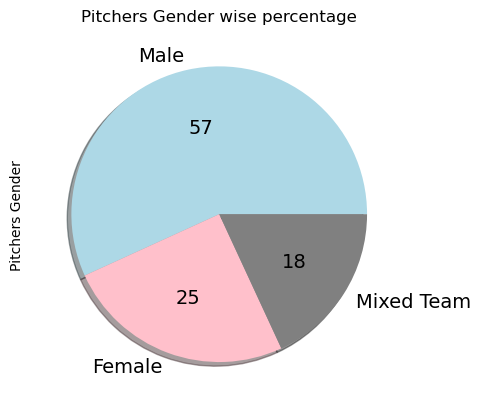

In [16]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Gender wise percentage")
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)

### 💹 59% companies received offers and 41% startups could not convince Sharks to invest

1.0    643
0.0    454
Name: Got Deal, dtype: int64 

1.0    59%
0.0    41%
Name: Got Deal, dtype: object


<AxesSubplot:ylabel='Got Deal'>

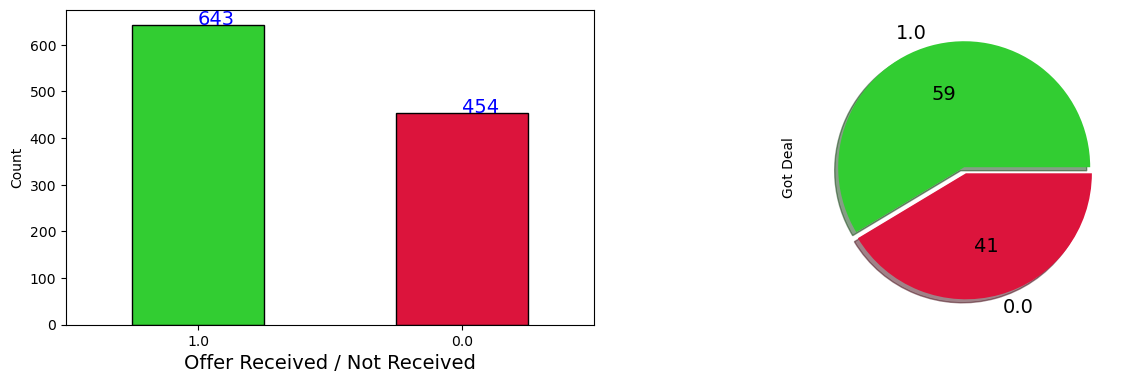

In [17]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Offer Received / Not Received", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")
    
ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)

# 643 companies received offers & 454 startups could not convince #Sharks to invest.

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [18]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [19]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [20]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [21]:
# Sum of investment amount asked
print("Sum of investment amount asked, by all startup companies, in Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in Shark Tank - $308,452,000


In [22]:
# Amount invested by all sharks
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $186,164,666


In [23]:
# Sum of loan/debt amount
print("Sum of loan/debt amount, given by all sharks, in American Shark Tank -", format_currency(shark_tank['Loan'].sum(), 'USD', locale='en_US').replace(".00", ""))
# Incomplete data

Sum of loan/debt amount, given by all sharks, in American Shark Tank - $1,475,037


In [24]:
# # Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in M'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in M', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in M', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in M'].map(float).map(str))
fig.show()

Startup Name
AirCar                     5000000.0
MokiDoorstep               3000000.0
SynDaverLabs               3000000.0
Zipz                       2500000.0
Fizzics                    2000000.0
TenThirtyOneProductions    2000000.0
Vengo                      2000000.0
RuggedManiac               1750000.0
BeyondSushi                1500000.0
Sworkit                    1500000.0
XCraft                     1500000.0
Trunkster                  1400000.0
HyConn                     1250000.0
Jackson'sHonest            1250000.0
TheRedDressBoutique        1200000.0
Name: Total Deal Amount, dtype: float64


In [25]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show()

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
Legacy Shave             95.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
TheLastLid               60.0
TreasureChestPets        60.0
CordaRoy's               58.0
Name: Total Deal Equity, dtype: float64


In [26]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who got debt/loan amount 42 



Season Number               Startup Name  Original Ask Amount  \
272              5           RapidRamenCooker             300000.0   
289              5                 BetterLife             400000.0   
291              5         PaparazziProposals             250000.0   
299              5                 Grace&Lace             175000.0   
300              5                       Yubo             150000.0   
433              6      Scratch&GrainBakingCo             150000.0   
459              6                   CocoJack             125000.0   
520              7              SavvyNaturals             200000.0   
563              7                    Sworkit            1500000.0   
571              7                 BetterBack             750000.0   
580              7                      Vengo            2000000.0   
586              7                    Coolbox             500000.0   
621              8                     TekDry             500000.0   
622              8             NightRunner270             250000.0   
636              8                  StyleClub             500000.0   
640              8  Jack'sStands&Marketplaces              50000.0   
642              8                       Toor             500000.0   
647              8                    Inboard             750000.0   
651              8              SealedbySanta             150000.0   
670              8              DBestProducts             350000.0   
684              8       BlentiqueWineCompany             250000.0   
686              8                   Rareform             300000.0   
703              8                Wine&Design             500000.0   
733              9                   WaiveCar             500000.0   
753              9                 EverlyWell            1000000.0   
754              9                       Mush             300000.0   
759              9                    Frywall             100000.0   
764              9                    Stasher             400000.0   
791              9               GunnarOptiks             750000.0   
845             10           MakeupJunkieBags             200000.0   
899             11                BoostOxygen            1000000.0   
924             11                      Outer             750000.0   
931             11                 Flexscreen             800000.0   
955             11                     Bohana             200000.0   
956             11                       Boho             300000.0   
959             11                      Goumi            1000000.0   
974             11               MuralPainter             300000.0   

     Total Deal Amount  Total Deal Equity  
272           300000.0              15.00  
289           400000.0              17.00  
291           250000.0              33.00  
299           175000.0              10.00  
300           150000.0              20.00  
433           150000.0              20.00  
459           125000.0              25.00  
520           200000.0              40.00  
563          1500000.0              10.00  
571           750000.0               7.50  
580          2000000.0              10.00  
586           500000.0              15.00  
621           500000.0               5.00  
622           200000.0              15.00  
636           500000.0              22.00  
640                0.0               0.00  
642           500000.0              10.00  
647           750000.0               4.00  
651           150000.0              20.00  
670           350000.0              20.00  
684           250000.0              10.00  
686           300000.0              10.00  
703           500000.0              10.00  
733           500000.0               2.00  
753          1000000.0               5.00  
754           300000.0              10.00  
759           100000.0              10.00  
764           400000.0              15.00  
791           750000.0               5.00  
845           200000.0  

In [27]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] == 1][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 55 



Season Number               Startup Name  Original Ask Amount  \
6                 1              ClassroomJams             250000.0   
10                1                TurboBaster              35000.0   
26                1                ElementBars             150000.0   
69                2    FirstDefenseNasalScreen             500000.0   
72                2            ModMomFurniture              90000.0   
77                2             HillbillyBrand              50000.0   
125               3              TheSmartBaker              75000.0   
207               4              CoffeeJoulies             150000.0   
208               4            TeddyNeedsABath              50000.0   
235               4                  CoolWraps             100000.0   
243               4         WickedGoodCupCakes              75000.0   
312               5             TheWallDoctoRX             150000.0   
316               5                 InvisiPlug             125000.0   
399               6                  Honeyfund             400000.0   
413               6                  Pipsnacks             200000.0   
491               6                 SharkWheel             100000.0   
505               7    TheTwoGuysBowtieCompany             150000.0   
534               7                  Trunkster            1400000.0   
542               7                  FireAvert             300000.0   
569               7                        PRx              80000.0   
578               7              InnovationPet             250000.0   
582               7                 Wondercide             500000.0   
630               8                   SiliDogs             100000.0   
634               8               PotatoParcel              50000.0   
653               8                   Digiwrap             150000.0   
691               8                 GuardLlama             100000.0   
698               8     Loctote Industrial Bag             150000.0   
735               9                 NoMo-Stach             100000.0   
739               9               BrilliantPad             500000.0   
758               9       ModernChristmasTrees             100000.0   
775               9                 RounderBum             150000.0   
795               9                  EggMazing             350000.0   
826              10               Bottlekeeper            1000000.0   
831              10                   PopItPal             250000.0   
849              10                  MontiKids             200000.0   
883              10  TheBestPocketSqaureHolder             250000.0   
895              11                   Blueland             270000.0   
898              11                   BabyToon              50000.0   
912              11                   MyoStorm             150000.0   
913              11                TailgateNGo             250000.0   
915              11                     EZCPak             125000.0   
924              11                      Outer             750000.0   
935              11              KreylEssence             400000.0   
949              11                PairEyewear             400000.0   
954              11              SpaceTraveler             100000.0   
961              11             CritterPricker             115000.0   
997              12                 PoochPaper             250000.0   
1000             12               AnimatedLure             325000.0   
1018             12       Buckle Me Baby Coats             100000.0   
1045             13                     SoaPen             100000.0   
1048             13                   Wad-Free             200000.0   
1064             13                Banana Loca             250000.0   
1074             14                  Stakt Mat             100000.0   
1078             14               TurboTrusser             100000.0   
1082             14                      Woosh             500000.0   

      Total Deal Amount  Tota

In [28]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number times asked

Original Ask Amount
100000.0    140
200000.0    115
150000.0    113
500000.0    109
250000.0     91
50000.0      81
300000.0     77
75000.0      43
400000.0     39
125000.0     28
dtype: int64

In [29]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number times offered

Original Offered Equity
10.0    346
20.0    207
15.0    142
5.0     129
25.0     69
30.0     30
8.0      26
7.0      14
12.0     13
40.0     12
dtype: int64

In [30]:
# Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Total Deal Amount (USD) and Number times invested

Total Deal Amount
100000.0    86
200000.0    73
150000.0    67
500000.0    59
300000.0    54
250000.0    53
50000.0     39
75000.0     27
400000.0    19
600000.0    13
dtype: int64

In [31]:
# Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Total Deal Equity (in %) and Number times invested

Total Deal Equity
25.0    105
20.0    101
30.0     63
10.0     62
15.0     56
40.0     33
50.0     32
33.0     23
5.0      20
35.0     19
dtype: int64

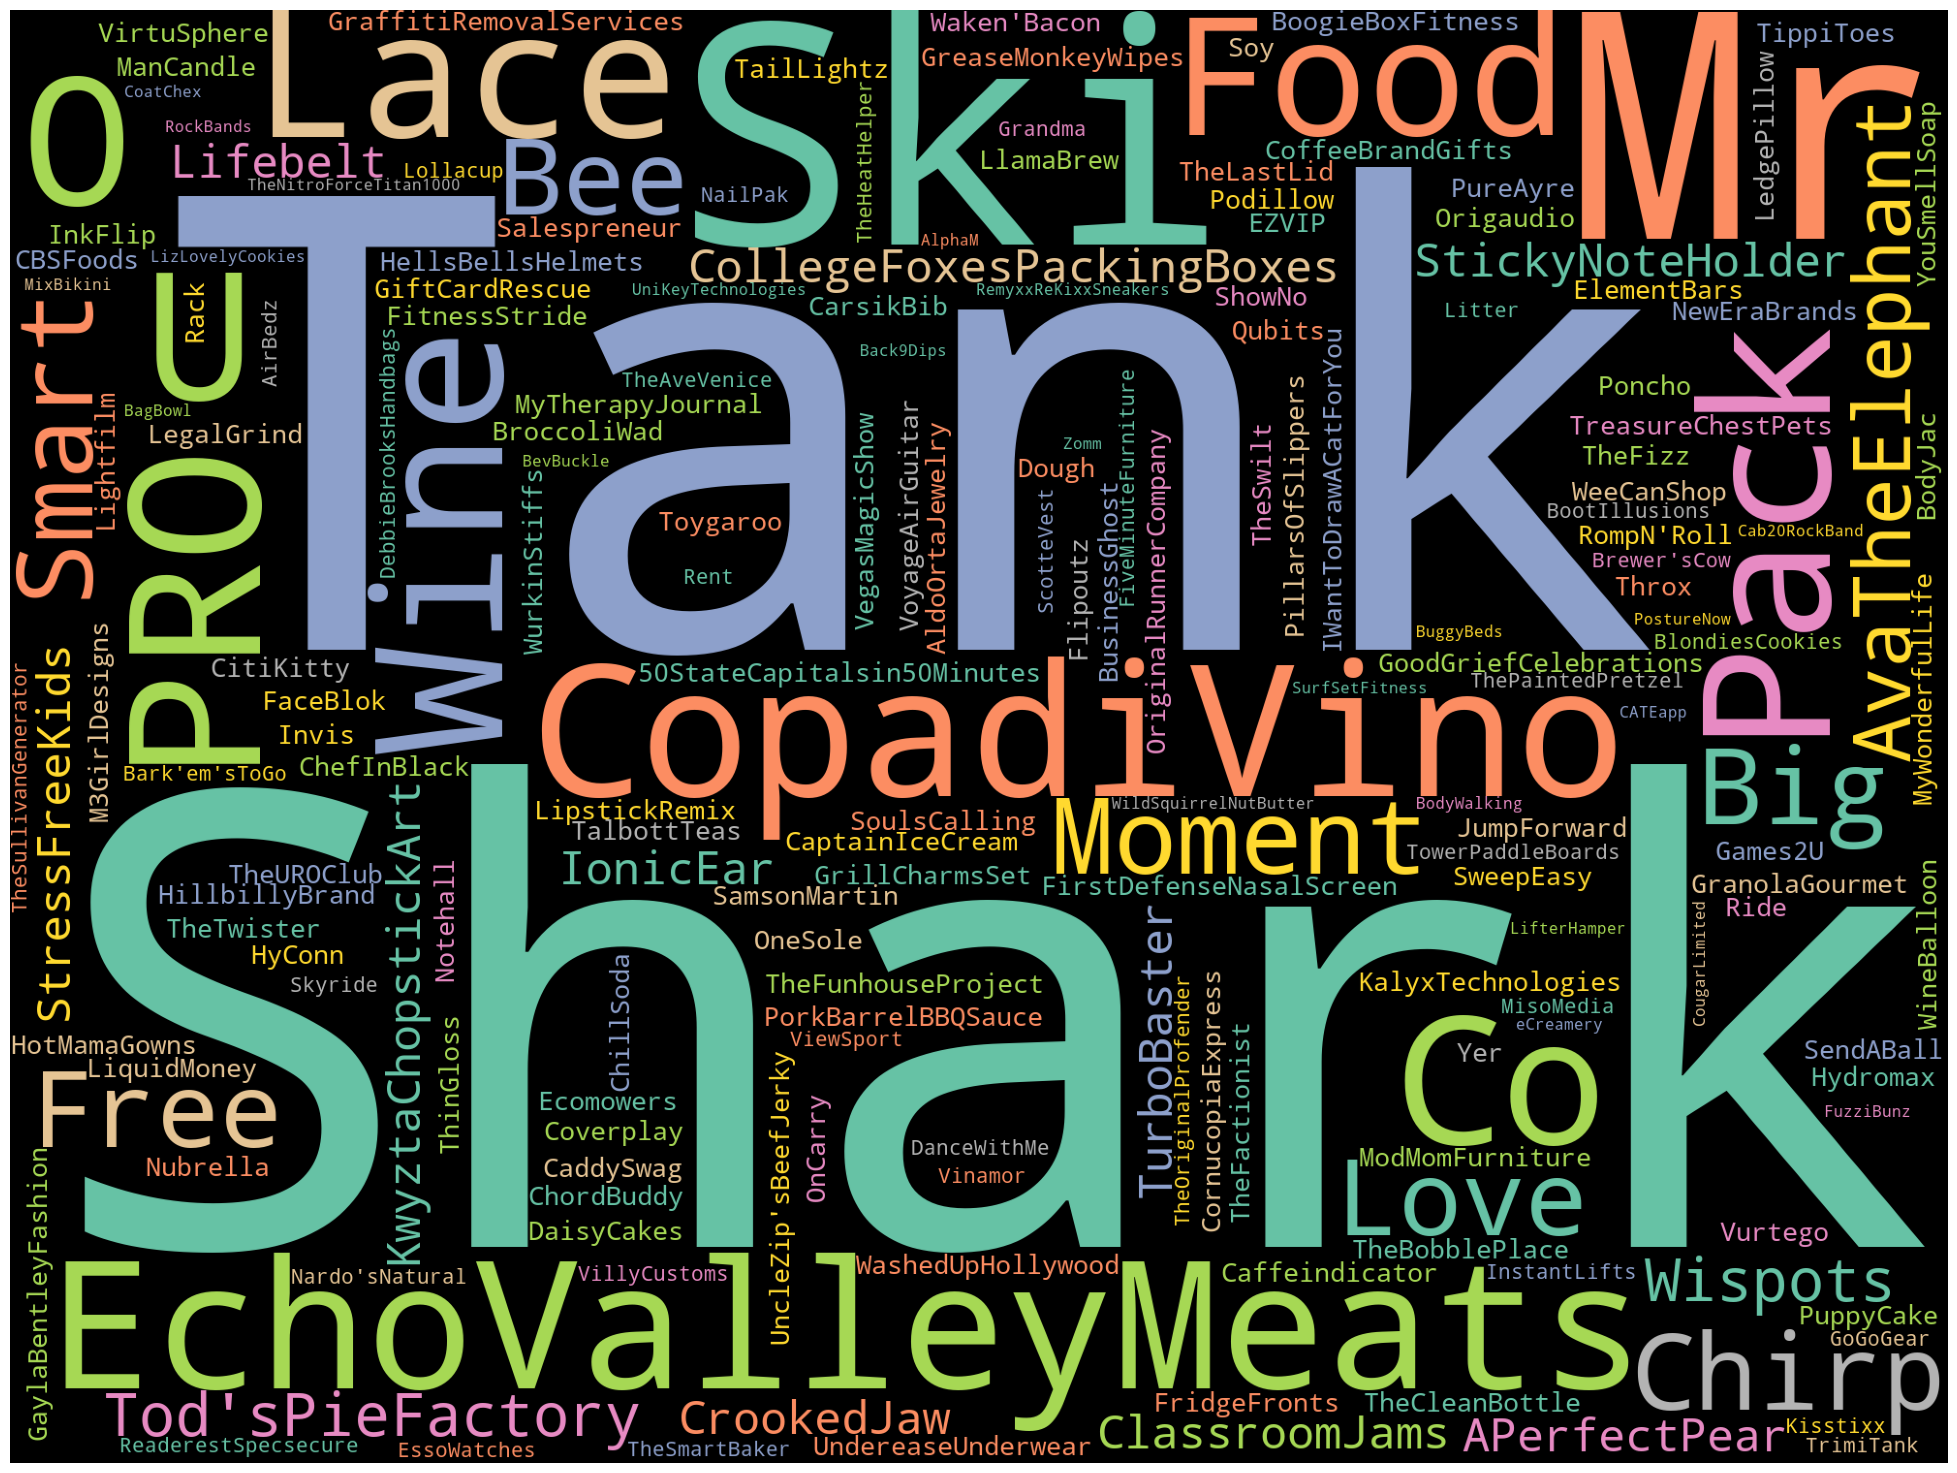

In [32]:
# Word cloud based on Startup Names
text = " Shark Tank ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 💰 Which shark invested most ?

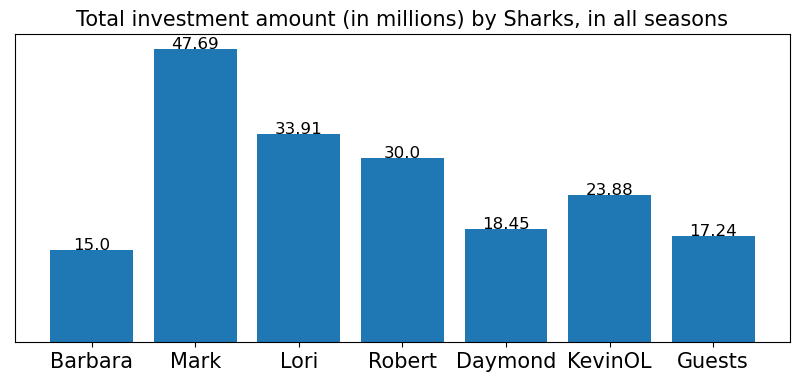

In [33]:
# Amount Invested by sharks
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

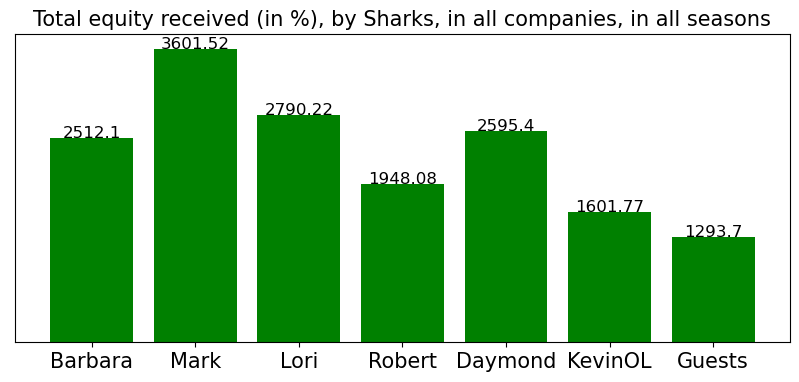

In [34]:
# Equity received by sharks
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

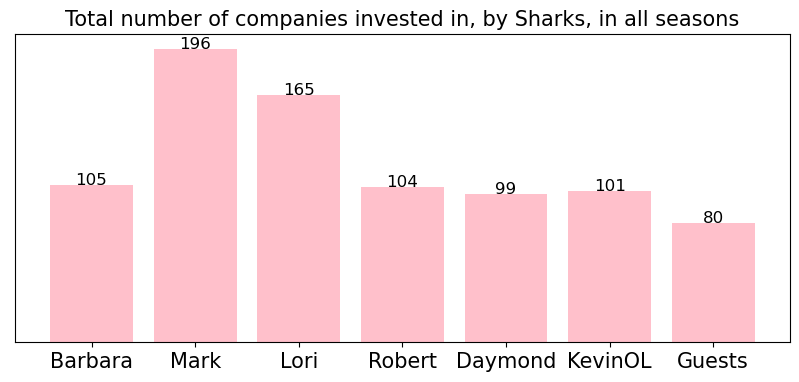

In [35]:
# Number of companies invested
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested in, by Sharks, in all seasons", fontsize=15)
plt.show()

In [36]:
# Top 5, guests sharks who invested in most number of companies
shark_tank.groupby('Guest Name').size().nlargest(5)

Guest Name
Chris Sacca         40
Rohan Oza           30
Sara Blakely        20
Alex Rodriguez      18
Bethenny Frankel    12
dtype: int64

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

1.0    473
2.0    146
3.0     16
5.0      5
4.0      3
Name: Number of sharks in deal, dtype: int64 

1.0    74%
2.0    23%
3.0     2%
5.0     1%
4.0     0%
Name: Number of sharks in deal, dtype: object


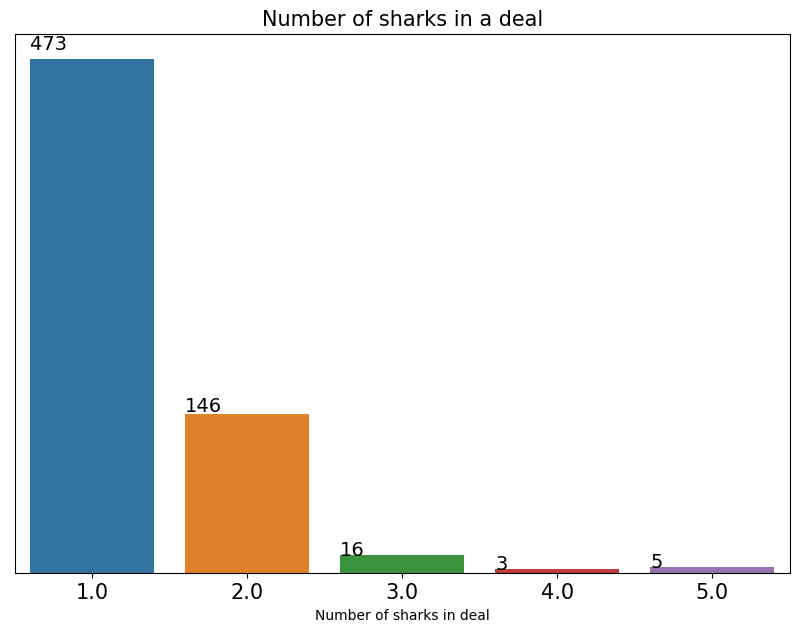

In [37]:
# Number of sharks in a deal
print(shark_tank['Number of sharks in deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of sharks in deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(10, 7))
plt.title("Number of sharks in a deal", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of sharks in deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [38]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of sharks in deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

     Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                1  ClassroomJams           250000.0              100.0
161              4      BuggyBeds           250000.0               25.0
268              5   Breathometer          1000000.0               30.0
514              7         XCraft          1500000.0               25.0
814             10    CupBoardPro           100000.0               20.0


In [39]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of sharks in deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# Mark did more solo deals, than any other Shark

Mark Cuban Investment Amount          98
Lori Greiner Investment Amount        87
Barbara Corcoran Investment Amount    68
dtype: int64

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 105
Investment amount by Barbara Corcoran $15,002,500
Equity received by Barbara Corcoran 2512.1 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                             50000.0
         Mr.Tod'sPieFactory       Food and Beverage                            230000.0
              ClassroomJams      Children/Education                             50000.0
             StressFreeKids      Children/Education                            250000.0
                  Coverplay      Children/Education                             35000.0
                    BodyJac Fitness/Sports/Outdoors                            180000.0
         PorkBarrelBBQSauce       Food and Beverage                             50000.0
          TreasureChestPets            Pet

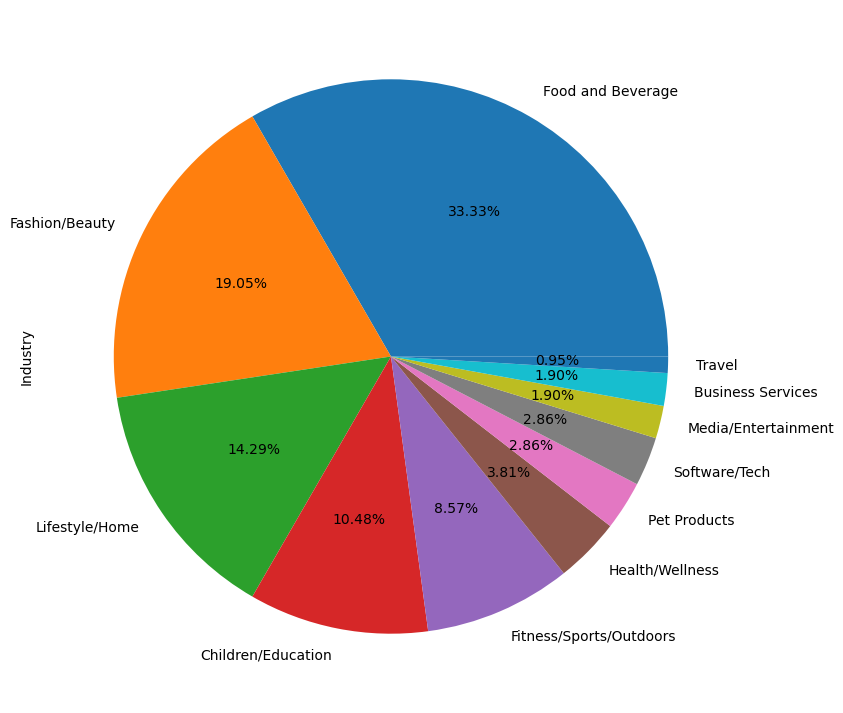

In [40]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-3:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Barbara Corcoran Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 196
Investment amount by Mark Cuban $47,690,000
Equity received by Mark Cuban 3601.52 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Mark Cuban Investment Amount
            ClassroomJams      Children/Education                  5.000000e+04
                TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                 Toygaroo      Children/Education                  1.000000e+05
  FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                   HyConn         Uncertain/Other                  1.250000e+06
                    EZVIP     Media/Entertainment                  7.500000e+04
           TheCleanBottle       Food and Beverage                  6.000000e+04
    IWantToDrawACatForYou           Software/Tech                  2.500000e+04
              WineBalloon       Food and Be

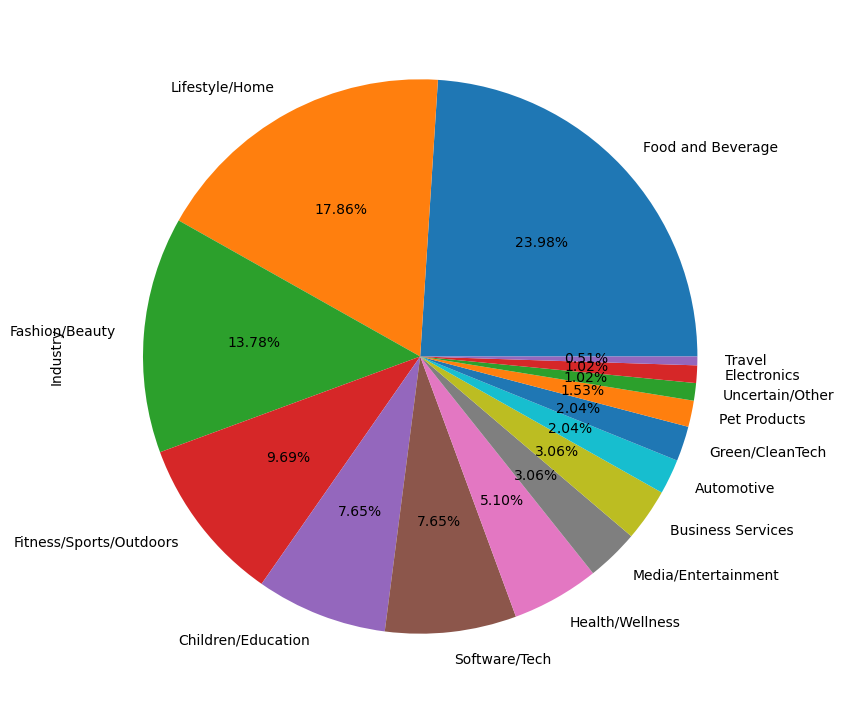

In [41]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Mark Cuban Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 165
Investment amount by Lori Greiner $33,910,000
Equity received by Lori Greiner 2790.22 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Lori Greiner Investment Amount
                 ShowNo          Fashion/Beauty                     75000.00000
          M3GirlDesigns          Fashion/Beauty                    100000.00000
    ReaderestSpecsecure          Lifestyle/Home                    150000.00000
                NailPak          Fashion/Beauty                     50000.00000
                BagBowl          Lifestyle/Home                     40000.00000
              Back9Dips       Food and Beverage                     75000.00000
             MarzSprays         Health/Wellness                    200000.00000
             ScrubDaddy          Lifestyle/Home                    200000.00000
           TheCoolWazoo      Children

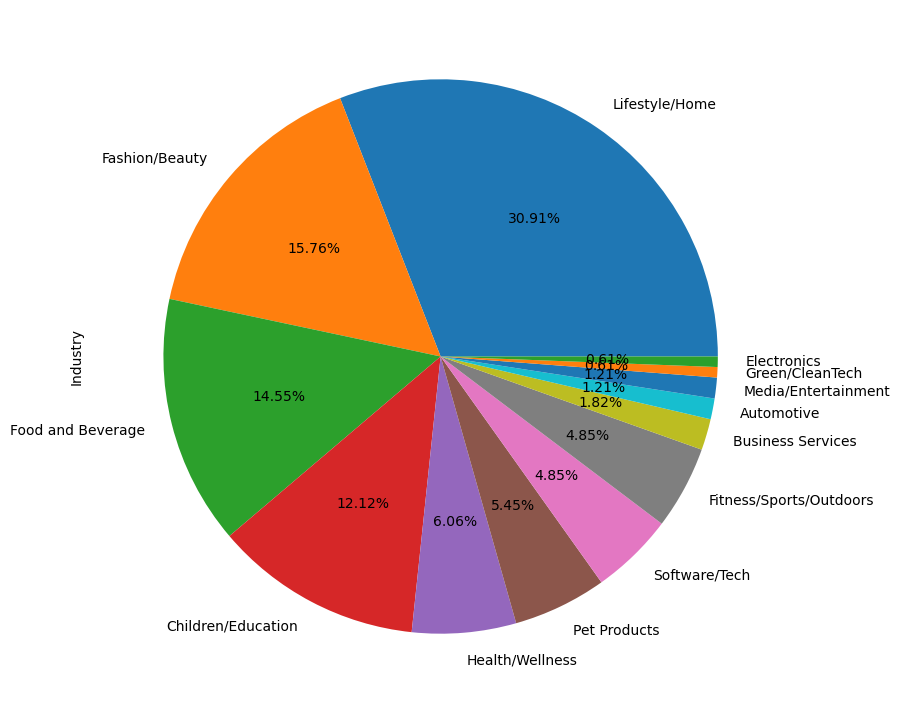

In [42]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Lori Greiner Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🚀 Robert Herjavec's Investments

Total investments by Robert Herjavec 104
Investment amount by Robert Herjavec $29,997,332.67
Equity received by Robert Herjavec 1948.08 % in different companies

Company details:
---------------------------------------------------------------------------
           Startup Name                Industry  Robert Herjavec Investment Amount
           APerfectPear       Food and Beverage                       2.500000e+05
          ClassroomJams      Children/Education                       5.000000e+04
         GiftCardRescue           Software/Tech                       1.000000e+05
       MyTherapyJournal         Health/Wellness                       4.000000e+04
          Soy-Yer-Dough       Food and Beverage                       1.000000e+05
         GrillCharmsSet          Fashion/Beauty                       5.000000e+04
            JumpForward      Children/Education                       3.000000e+05
      GreaseMonkeyWipes          Lifestyle/Home                       2.000000e+0

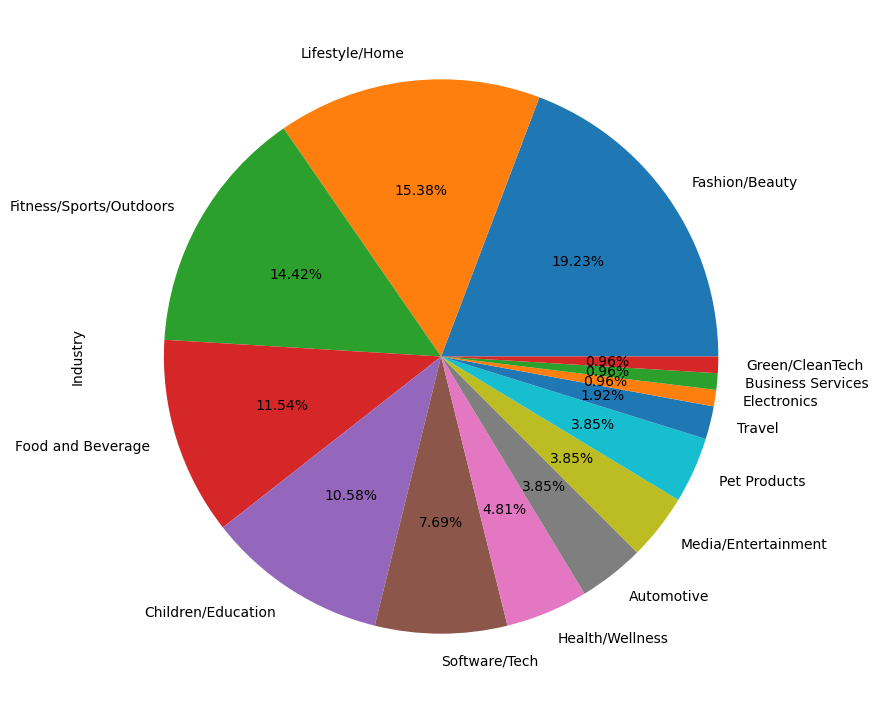

In [43]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-3:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Robert Herjavec Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎾 Daymond John's Investments

Total investments by Daymond John  99
Investment amount by Daymond John $18,446,500
Equity received by Daymond John 2595.4 % in different companies

Company details:
---------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
         Mr.Tod'sPieFactory       Food and Beverage                        230000.0
              ClassroomJams      Children/Education                         50000.0
              Soy-Yer-Dough       Food and Beverage                        100000.0
          TreasureChestPets            Pet Products                         50000.0
        GaylaBentleyFashion          Fashion/Beauty                        125000.0
          HellsBellsHelmets Fitness/Sports/Outdoors                        500000.0
              LipstickRemix          Fashion/Beauty                         52500.0
                   Nubrella          Fashion/Beauty                        200000.0
  

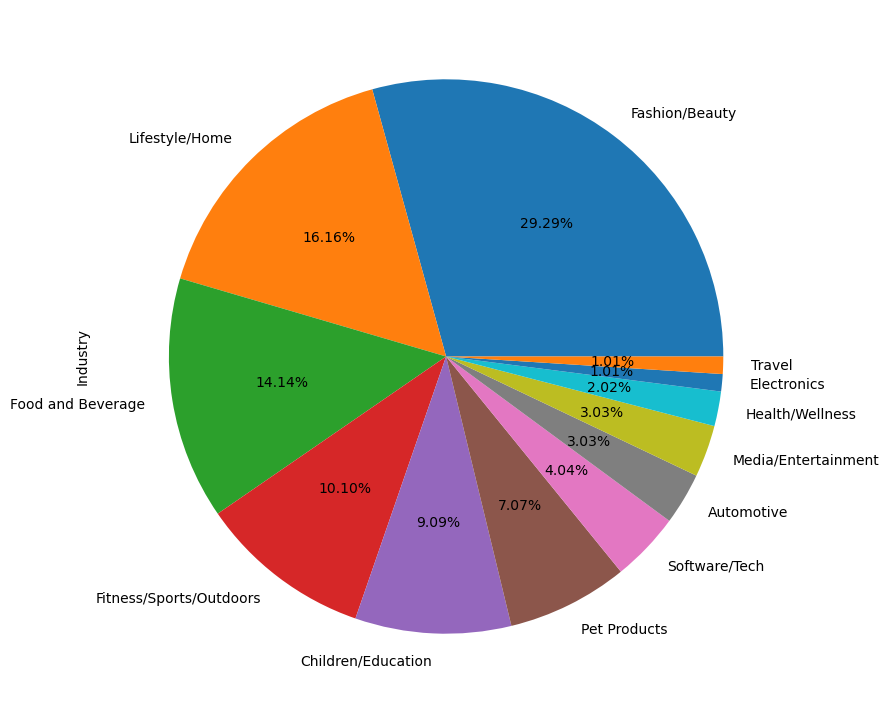

In [44]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-3:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Daymond John Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 101
Investment amount by Kevin O Leary $23,882,500
Equity received by Kevin O Leary 1601.77 % in different companies

Company details:
---------------------------------------------------------------------------
          Startup Name                Industry  Kevin O Leary Investment Amount
          APerfectPear       Food and Beverage                     2.500000e+05
         ClassroomJams      Children/Education                     5.000000e+04
        GiftCardRescue           Software/Tech                     1.000000e+05
      MyTherapyJournal         Health/Wellness                     4.000000e+04
         Soy-Yer-Dough       Food and Beverage                     1.000000e+05
           JumpForward      Children/Education                     3.000000e+05
              Toygaroo      Children/Education                     1.000000e+05
          FridgeFronts          Lifestyle/Home                     5.000000e+04
           TalbottTeas       Food 

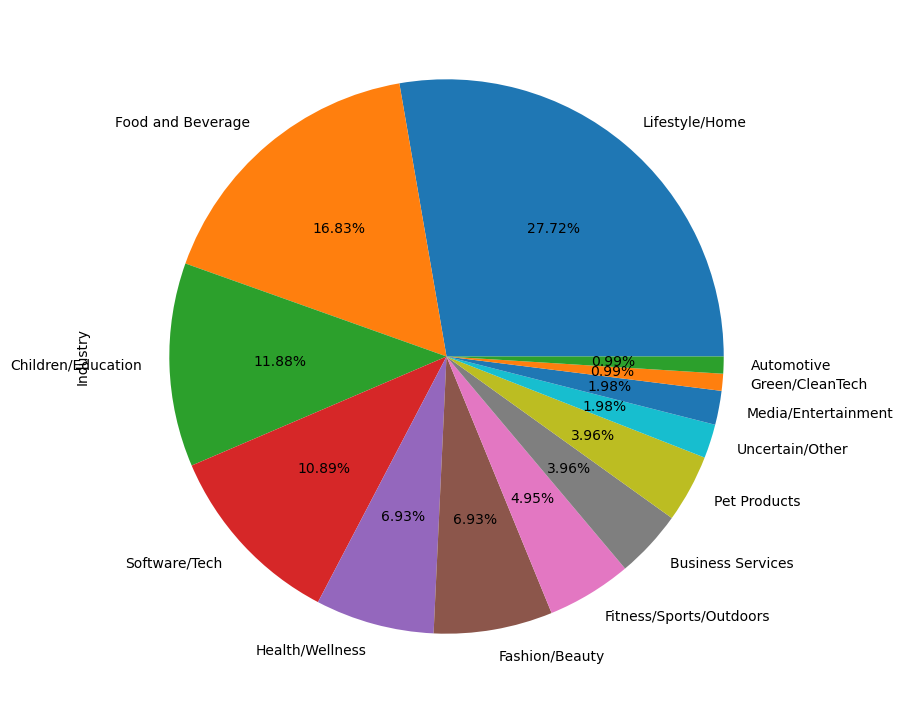

In [45]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-3:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Kevin O Leary Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

## 🎆 Guest's Investments

Total investments by all Guests 79
Investment amount by all Guests $17,235,833.33
Equity received by all Guests 1293.7 % in different companies

Company details:
---------------------------------------------------------------------------
             Startup Name                Industry  Guest Investment Amount
              TurboBaster       Food and Beverage             3.500000e+04
              ElementBars Fitness/Sports/Outdoors             1.500000e+05
               TheUROClub Fitness/Sports/Outdoors             2.500000e+04
           Caffeindicator       Food and Beverage             2.000000e+05
                 Hydromax Fitness/Sports/Outdoors             5.000000e+04
                CitiKitty            Pet Products             1.000000e+05
               Tree-T-Pee         Green/CleanTech             1.500000e+05
       TheCookieDoughCafe       Food and Beverage             5.000000e+04
              KitchenSafe       Food and Beverage             5.000000e+04
            

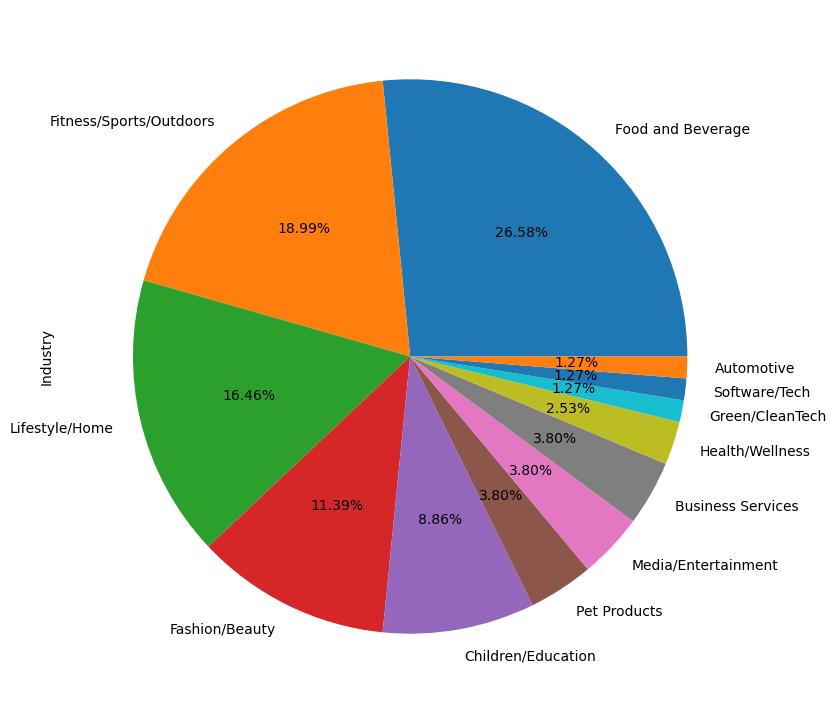

In [46]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*75)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount"]].to_string(index=False))
print('-'*75)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show()

In [47]:
# tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
# fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=800, height=800, color="Guest Investment Equity")
# fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
# fig.update_traces(textposition='middle center')
# fig.show()

In [48]:
# Top 25 US 🇺🇸 states of pitcher's
tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers State", title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [49]:
# Top 20 cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x="Pitchers City", title="<b>Top 20 cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show()

In [50]:
# Many (100+) companies got more amount than they asked/expected
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Season Number    Startup Name  Original Ask Amount  Total Deal Amount
15                1  GiftCardRescue             150000.0           200000.0
30                1   Soy-Yer-Dough             125000.0           300000.0
43                1     JumpForward             150000.0           600000.0
64                2    WurkinStiffs              85000.0           100000.0
65                2       TippiToes              30000.0           100000.0
...             ...             ...                  ...                ...
1056             13    Pink Picasso             400000.0           500000.0
1072             14       Oogiebear             400000.0           600000.0
1077             14      TheWoobles             250000.0           450000.0
1093             14          Wondry             185000.0           225000.0
1096             14    Legacy Shave             300000.0           700000.0

[110 rows x 4 columns]

In [51]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number        Startup Name  Original Offered Equity  \
0                 1      AvaTheElephant                     15.0   
1                 1  Mr.Tod'sPieFactory                     10.0   
5                 1        APerfectPear                     15.0   
6                 1       ClassroomJams                     10.0   
10                1         TurboBaster                     35.0   
...             ...                 ...                      ...   
1092             14        Collars & Co                      4.0   
1093             14              Wondry                      8.0   
1094             14                Frsh                      5.0   
1095             14          Actionglow                     15.0   
1096             14        Legacy Shave                     10.0   

      Total Deal Equity  
0                  55.0  
1                  50.0  
5                  50.0  
6                 100.0  
10                100.0  
...                 ...  
1092               10.0  
1093               15.0  
1094               20.0  
1095               30.0  
1096               95.0  

[541 rows x 4 columns]

In [52]:
# Below companies got the same valuation they requested
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number       Startup Name  Valuation Requested  Deal Valuation
51                1  GreaseMonkeyWipes             100000.0        100000.0
60                1             Qubits             176471.0        176471.0
78                2    Ride-OnCarry-On             200000.0        200000.0
85                2         DaisyCakes             200000.0        200000.0
92                2             HyConn            1250000.0       1250000.0
...             ...                ...                  ...             ...
999              12           HugSleep            1500000.0       1500000.0
1000             12       AnimatedLure            3250000.0       3250000.0
1030             12     Bubbly Blaster             600000.0        600000.0
1045             13             SoaPen            1000000.0       1000000.0
1082             14              Woosh            5000000.0       5000000.0

[92 rows x 4 columns]

In [53]:
# There are companies which got more valuation than they pitched
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Season Number              Startup Name  Valuation Requested  \
30                1             Soy-Yer-Dough             500000.0   
31                1            GrillCharmsSet             200000.0   
77                2            HillbillyBrand             200000.0   
84                2                 SweepEasy             160000.0   
104               3     IWantToDrawACatForYou              40000.0   
112               3               WineBalloon             133333.0   
113               3                    ShowNo             200000.0   
149               3             BootIllusions             333333.0   
232               4              Lose12Inches             480000.0   
268               5              Breathometer            2500000.0   
276               5                 Hamboards             666667.0   
285               5                  FiberFix             900000.0   
323               5        TheCookieDoughCafe             250000.0   
324               5                Cycloramic            1800000.0   
336               5                RevoLights            1500000.0   
400               6          BeatBoxBeverages            2000000.0   
436               6                     Lumio            3125000.0   
444               6               DrainStrain             733333.0   
491               6                SharkWheel            2000000.0   
502               7                  Loliware            1500000.0   
514               7                    XCraft            2500000.0   
517               7               Windcatcher            2500000.0   
580               7                     Vengo           16000000.0   
582               7                Wondercide           10000000.0   
654               8             HandOutGloves             750000.0   
671               8                 Tranquilo            1000000.0   
675               8                   Toymail           10000000.0   
721               9                 IceShaker             666667.0   
744               9                 DNASimple             800000.0   
775               9                RounderBum            1500000.0   
788               9                   Radiate             250000.0   
829              10                  OatMeals            2500000.0   
831              10                  PopItPal            2500000.0   
845              10          MakeupJunkieBags            1333333.0   
852              10                   SubSafe             384615.0   
912              11                  MyoStorm            1500000.0   
925              11  Mrs.Goldfarb'sUnrealDeli            1000000.0   
935              11             KreylEssence            4000000.0   
1077             14                TheWoobles            5000000.0   

      Deal Valuation  
30          588235.0  
31          250000.0  
77          300000.0  
84          227273.0  
104          75758.0  
112         400000.0  
113         300000.0  
149        1250000.0  
232         500000.0  
268        3333333.0  
276        1000000.0  
285        2083333.0  
323         333333.0  
324        3333333.0  
336        3000000.0  
400        3030303.0  
436        3500000.0  
444        1100000.0  
491        3000000.0  
502        2400000.0  
514        6000000.0  
517        4000000.0  
580       20000000.0  
582       16666667.0  
654        1200000.0  
671        1333333.0  
675       12000000.0  
721        1000000.0  
744        1333333.0  
775        3000000.0  
788         400000.0  
829       15000000.0  
831        5000000.0  
845        4000000.0  
852         400000.0  
912        3000000.0  
925        1250000.0  
935        8000000.0  
1077       7500000.0

In [54]:
# Episodes which got most TRP
print("Maximum viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum viewership in US: 8.64 

 Season Number  Episode Number    Startup Name  US Viewership
             6              15        TurboPUP           8.64
             6              15           Lumio           8.64
             6              15      BelloVerde           8.64
             6              15         Napwell           8.64
             6              20        LuminAid           8.43
             6              20         Scholly           8.43
             6              20        KeenHome           8.43
             6              20    TaalumaTotes           8.43
             5              27       Angellift           8.33
             5              27        HangEase           8.33
             5              27 TheBouqsCompany           8.33
             5              27      SustyParty           8.33
             5              21   PackbackBooks           8.29
             5              21          Chapul           8.29
             5              21  Garag

In [55]:
# Episodes which got least TRP
print("Minimum viewership in US:", shark_tank['US Viewership'].min(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']<=shark_tank['US Viewership'].min()+0.8][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership").to_string(index=False))

Minimum viewership in US: 2.27 

 Season Number  Episode Number     Startup Name  US Viewership
            10              11      SonnetJames           2.82
            10              11   AngelShaveClub           2.82
            10              11 MakeupJunkieBags           2.82
            10              11       KittyKasas           2.82
             9              22     GunnarOptiks           2.87
             9              22          Sunniva           2.87
             9              22        Solsource           2.87
             9              22       Avocaderia           2.87
            11               5        Golfkicks           2.89
            11               5         MyoStorm           2.89
            11               5      TailgateNGo           2.89
            11               5        NerditNow           2.89
            11               9        KitLender           2.92
            11               9      Beardaments           2.92
            10        

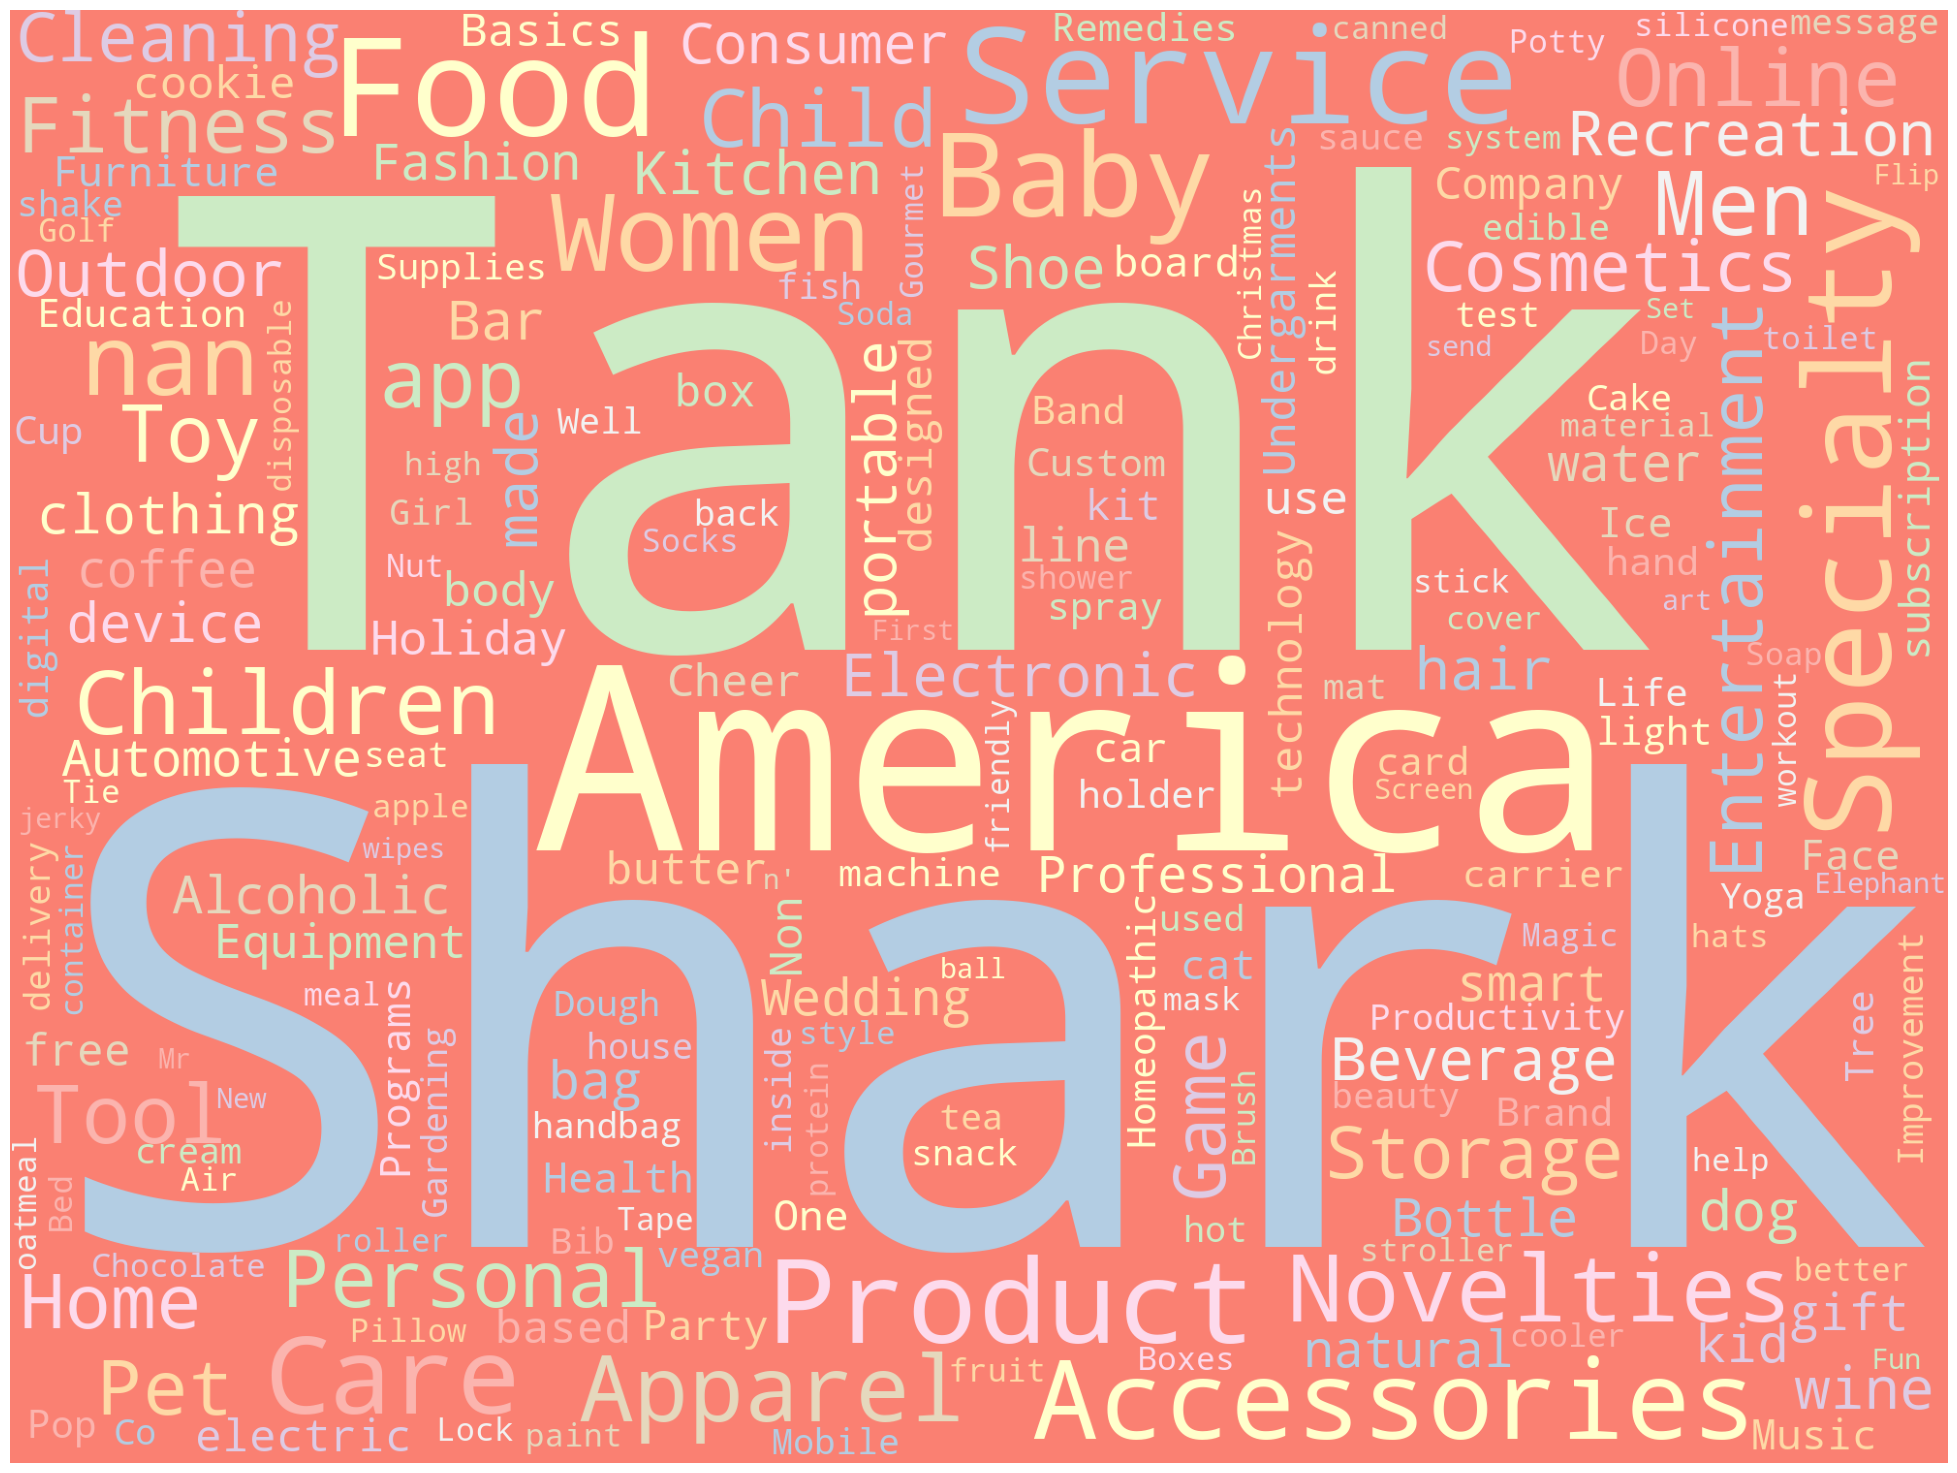

In [56]:
# Word cloud based on Business Description, startups came in season 1
text = " Shark Tank America ".join(cat for cat in shark_tank['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2023).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [57]:
# Correlation matrix
shark_tank.corr().style.background_gradient(cmap = 'Blues')

In [58]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current versions
# numpy version: 1.21.6
# pandas version: 1.3.5
# matplotlib version: 3.5.3
# seaborn version: 0.12.2
# plotly version: 5.13.0

numpy version: 1.21.6
pandas version: 1.3.5
matplotlib version: 3.5.3
seaborn version: 0.12.2
plotly version: 5.13.0


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [59]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [60]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [61]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [62]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of sharks in deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [63]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [64]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [65]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [66]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [67]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [68]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [69]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [70]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' and ')==False)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
443              6    26-Sep-14  15-May-15              17           444   

    Original Air Date Startup Name      Industry        Business Description  \
443         03-Feb-15   FreshPatch  Pet Products  Fresh Patch - Pet Products   

    Pitchers Gender Pitchers City Pitchers State Pitchers Average Age  \
443      Mixed Team     Davenport             FL                  NaN   

    Entrepreneur Names             Company Website  Multiple Entrepreneurs  \
443        Andrew Feld  https://www.freshpatch.com                       1   

     US Viewership  Original Ask Amount  Original Offered Equity  \
443           7.14             150000.0                     10.0   

     Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
443            1500000.0       1.0           150000.0               20.0   

     Deal Valuation  Number of sharks in deal  ...  Equity Per Shark  \
443        750000.0                       2.0  ...              10.0   

     Royalty Deal  Loan  Barbara Corcoran Investment Amount  \
443           NaN   NaN                             75000.0   

     Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
443                                10.0                       75000.0   

     Mark Cuban Investment Equity  Lori Greiner Investment Amount  \
443                          10.0                             NaN   

     Lori Greiner Investment Equity  Robert Herjavec Investment Amount  \
443                             NaN                                NaN   

     Robert Herjavec Investment Equity  Daymond John Investment Amount  \
443                                NaN                             NaN   

     Daymond John Investment Equity  Kevin O Leary Investment Amount  \
443                             NaN                              NaN   

     Kevin O Leary Investment Equity  Guest Investment Amount  \
443                              NaN                      NaN   

     Guest Investment Equity  Guest Name Barbara Corcoran Present  \
443                      NaN         NaN                      1.0   

     Mark Cuban Present  Lori Greiner Present  Robert Herjavec Present  \
443                 1.0                   1.0                      1.0   

     Daymond John Present  Kevin O Leary Present  Total Deal Amount in M  
443                   0.0                    1.0                    0.15  

[1 rows x 51 columns]

In [71]:
shark_tank.loc[(shark_tank['Got Deal'] != 0) & (shark_tank['Got Deal'] != 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
1097             14    23-Sep-22        NaN               7          1099   
1098             14    23-Sep-22        NaN               8          <NA>   
1099             14    23-Sep-22        NaN               8          <NA>   
1100             14    23-Sep-22        NaN               8          <NA>   
1101             14    23-Sep-22        NaN               8          <NA>   
1102             14    23-Sep-22        NaN               9          <NA>   
1103             14    23-Sep-22        NaN               9          <NA>   
1104             14    23-Sep-22        NaN               9          <NA>   
1105             14    23-Sep-22        NaN               9          <NA>   
1106             14    23-Sep-22        NaN              10          <NA>   
1107             14    23-Sep-22        NaN              10          <NA>   
1108             14    23-Sep-22        NaN              10          <NA>   
1109             14    23-Sep-22        NaN              10          <NA>   
1110             14    23-Sep-22        NaN              11          <NA>   
1111             14    23-Sep-22        NaN              11          <NA>   
1112             14    23-Sep-22        NaN              11          <NA>   
1113             14    23-Sep-22        NaN              11          <NA>   
1114             14    23-Sep-22        NaN              12          <NA>   
1115             14    23-Sep-22        NaN              12          <NA>   
1116             14    23-Sep-22        NaN              12          <NA>   
1117             14    23-Sep-22        NaN              12          <NA>   
1118             14    23-Sep-22        NaN              13          <NA>   
1119             14    23-Sep-22        NaN              13          <NA>   
1120             14    23-Sep-22        NaN              13          <NA>   
1121             14    23-Sep-22        NaN              13          <NA>   
1122             14    23-Sep-22        NaN              14          <NA>   
1123             14    23-Sep-22        NaN              14          <NA>   
1124             14    23-Sep-22        NaN              14          <NA>   
1125             14    23-Sep-22        NaN              14          <NA>   
1126             14    23-Sep-22        NaN              14          <NA>   
1127             14    23-Sep-22        NaN              14          <NA>   
1128             14    23-Sep-22        NaN              14          <NA>   
1129             14    23-Sep-22        NaN              14          <NA>   
1130             14    23-Sep-22        NaN              15          <NA>   
1131             14    23-Sep-22        NaN              15          <NA>   
1132             14    23-Sep-22        NaN              15          <NA>   
1133             14    23-Sep-22        NaN              15          <NA>   
1134             14    23-Sep-22        NaN              16          <NA>   
1135             14    23-Sep-22        NaN              16          <NA>   
1136             14    23-Sep-22        NaN              16          <NA>   
1137             14    23-Sep-22        NaN              16          <NA>   

     Original Air Date          Startup Name Industry Business Description  \
1097               NaN             Boarderie      nan                  nan   
1098               NaN            HummViewer      nan                  nan   
1099               NaN          FireFighter1      nan                  nan   
1100               NaN            ShredSkinz      nan                  nan   
1101               NaN          SliimeyHoney      nan                  nan   
1102               NaN         Chessup Smart      nan                  nan   
1103               NaN             ZipString      nan                  nan   
1104               NaN   Garage Celebrations      nan                  nan   
1105               NaN          ReadyFestive      nan                

In [72]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Season Start, Season End, Episode Number, Pitch Number, Original Air Date, Startup Name, Industry, Business Description, Pitchers Gender, Pitchers City, Pitchers State, Pitchers Average Age, Entrepreneur Names, Company Website, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of sharks in deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Loan, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Total Deal Amount in M]
Index: []

[0 rows x 51 columns]

In [73]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Season Number Season Start Season End  Episode Number  Pitch Number  \
73               2    20-Mar-11  13-May-11               3            74   
144              3    20-Jan-12  18-May-12              12           145   
279              5    20-Sep-13  16-May-14               5           280   
280              5    20-Sep-13  16-May-14               5           281   
303              5    20-Sep-13  16-May-14              11           304   
319              5    20-Sep-13  16-May-14              15           320   
365              5    20-Sep-13  16-May-14              26           366   

    Original Air Date              Startup Name            Industry  \
73          01-Apr-11                  Flipoutz      Fashion/Beauty   
144         27-Apr-12                  Lollacup  Children/Education   
279         18-Oct-13      VeggieMamaGardenPops   Food and Beverage   
280         18-Oct-13   RuffleButts-RuggedButts      Fashion/Beauty   
303         06-Dec-13  De-BonedBabyBackRibSteak   Food and Beverage   
319         24-Jan-14                   SwimZip  Children/Education   
365         25-Apr-14                  Mo'sBows      Fashion/Beauty   

                                  Business Description Pitchers Gender  \
73                     Flipoutz - Toys and Games coins      Mixed Team   
144                     Lollacup - Baby and Child Care      Mixed Team   
279  Veggie Mama Garden Pops - Baby and Children's ...      Mixed Team   
280  Ruffle Butts - Rugged Butts - Baby and Childre...      Mixed Team   
303      De-Boned Baby Back Rib Steak - Specialty Food      Mixed Team   
319                      SwimZip - Baby and Child Care      Mixed Team   
365                      Mo's Bows - Men's Accessories      Mixed Team   

    Pitchers City Pitchers State Pitchers Average Age  \
73   Myrtle Beach             NC                  NaN   
144      Monrovia             CA                  NaN   
279        Upland             CA                  NaN   
280     Grapevine             TX                  NaN   
303          Avon             OH                  NaN   
319   Kansas City             KS                  NaN   
365       Memphis             TN                  NaN   

          Entrepreneur Names                    Company Website  \
73             Emily Johnson           http://www.flipoutz.com/   
144                Hanna Lim          http://www.lollaland.com/   
279           Theresa Fraijo          http://www.veggiemama.com   
280             Amber Schaub         http://www.rufflebutts.com   
303           Al Bubba Baker  http://www.bubbasbonelessribs.com   
319  Betsy Johnson (Wanless)             http://www.swimzip.com   
365           Moziah Bridges          http://mosbowsmemphis.com   

     Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
73                        0           4.87             100000.0   
144                       0           5.42             100000.0   
279                       0           6.64              75000.0   
280                       0           6.64             600000.0   
303                       0           7.55             300000.0   
319                       0           8.18              60000.0   
365                       0           7.11              50000.0   

     Original Offered Equity  Valuation Requested  Got Deal  \
73                      20.0             500000.0       1.0   
144                     15.0             666667.0       1.0   
279                     15.0             500000.0       1.0   
280                      7.0            8571429.0       1.0   
303                     15.0            2000000.0       1.0   
319                      5.0            1200000.0       1.0   
365                     20.0             250000.0       0.0   

     Total Deal Amount  Total Deal Equity  Deal Valuation  \
73            100000.0               25.0        400000.0   
144           100000.0               40.0        250000.0   
279            